In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
#from mpl_toolkits.mplot3 import Axes3D

In [11]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
l = df['label']
d = df.drop('label',axis=1)

print(l.shape)
print(d.shape)

(42000,)
(42000, 784)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


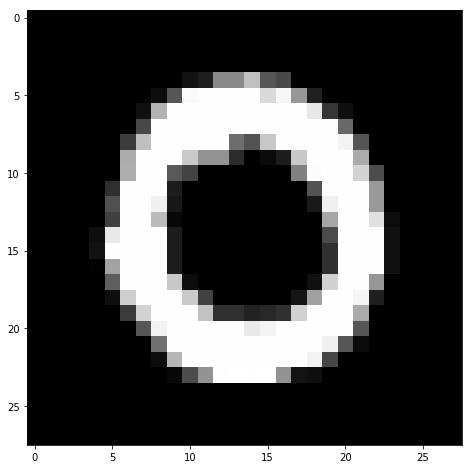

0


In [25]:
plt.figure(figsize=(10,8))
idx=1


# d.iloc[idx] fetch 1st row in train set
# as_matrix() converts to 1d array
# reshape(28,28) convertes to array with 28 rows and 28 columns thus to 2d array

grid_data = d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data, interpolation='none', cmap='gray')
plt.show()

print(l[idx])

# 2D visualization using PCA Below

In [27]:
#Picking first 15k data points to work on for time effeciency

label = l.head(15000)
data = d.head(15000)

print(data.shape)
print(label.shape)

(15000, 784)
(15000,)


In [28]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [37]:
#find the co-variance matrix which is : A^T * A

sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data)

print('resultant new data points shape :', sample_data.T.shape, 'X', sample_data.shape,' = ',covar_matrix.shape)

resultant new data points shape : (784, 15000) X (15000, 784)  =  (784, 784)


In [34]:
# finding the top two eigen-values and corresponding eigen-vectors for projecting onto a 2-Dim space.

from scipy.linalg import eigh

# Parameter 'eigvals' is defined (low value to high value)
# eigh function will return eigen values in ascending order
# This code generates only top 2 (782,783) eigen values 

values,vectors = eigh(covar_matrix,eigvals=(782,783))
print('shape of eigen vectors:',vectors.shape)

# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T
print('shape of eigen vectors:',vectors.shape)

# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

shape of eigen vectors: (784, 2)
shape of eigen vectors: (2, 784)


In [36]:
# Projecting original data sample on plane
# formed by two principle eigen vectors by vector-vector multiplication

new_coordinates = np.matmul(vectors, sample_data.T)
print('resultant new data points shape :', vectors.shape, 'X', sample_data.T.shape,' = ',new_coordinates.shape)

resultant new data points shape : (2, 784) X (784, 15000)  =  (2, 15000)


In [38]:
import pandas as pd

#appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates,label)).T

# creating a new dataframe for plotting labelled points
dataframe = pd.DataFrame(data=new_coordinates, columns=['1st_principal','2nd_principal','label'])
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


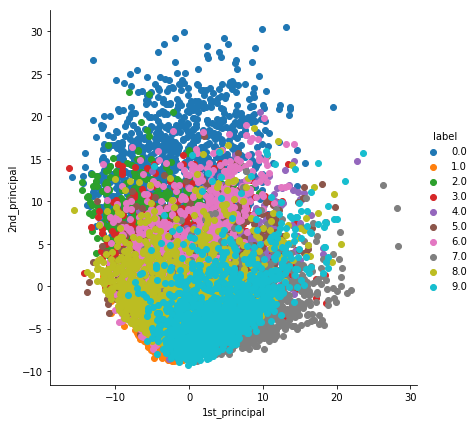

In [58]:

sns.FacetGrid(dataframe, hue='label',size=6)\
.map(plt.scatter, '1st_principal','2nd_principal')\
.add_legend()
plt.show()

# PCA using Scikit-Learn

In [61]:
#initializing pca

from sklearn import decomposition
pca = decomposition.PCA()

#configuring parameters, the number of component = 2
pca.n_components = 2 #2 principle components
pca_data = pca.fit_transform(sample_data) # generates 2 principle complenents for each data point
print(pca_data.shape)

(15000, 2)


(15000, 3)


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


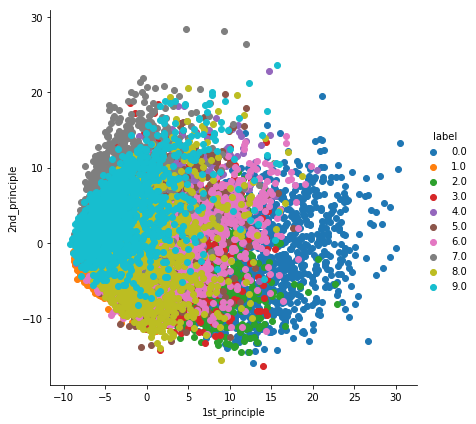

In [62]:
#attaching label with each 2d data point
pca_data = np.vstack((pca_data.T,label)).T
print(pca_data.shape)

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data,columns=('1st_principle','2nd_principle','label'))

sns.FacetGrid(pca_df,hue='label',size=6)\
.map(plt.scatter,'1st_principle','2nd_principle')\
.add_legend()

plt.show()


# PCA for dimensionality reduction

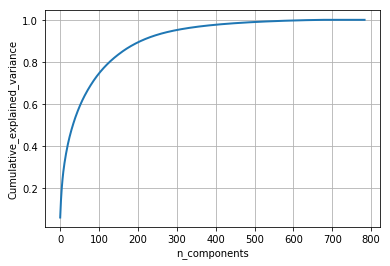

In [65]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)
pca_data.shape


percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

#Plot shows the variance explained at any given dimension
#ex: There is approx 90% variance explained at 200 dimension

## T-SNE using scikit-learn

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


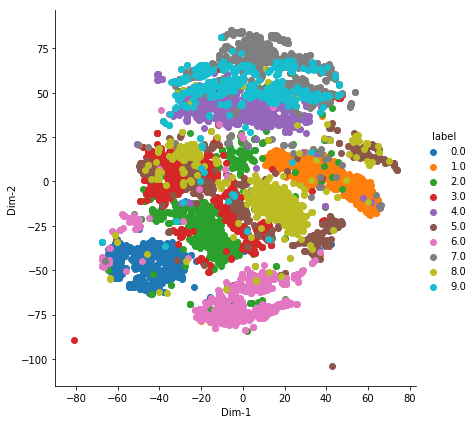

In [70]:
from sklearn.manifold import TSNE

n_components =2
sample_data = standardized_data[0:5000,:] #picking just 10k points 
labels = label[0:5000] 

model = TSNE(n_components,random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(sample_data)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim-1","Dim-2","label"))


# Ploting the result of tsne
sns.FacetGrid(tsne_df,hue='label',size=6)\
.map(plt.scatter,"Dim-1","Dim-2")\
.add_legend()
plt.show()